# Validation

In [ ]:
# Setting seeds to try and ensure we have the same results - this is not guaranteed across PyTorch releases.
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import numpy as np
np.random.seed(0)

In [ ]:
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch import nn

mean, std = (0.5,), (0.5,)

# Create a transform and normalise data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)
                              ])

# Download FMNIST training dataset and load training data
trainset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download FMNIST test dataset and load test data
testset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw



In [ ]:
class FMNIST(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128,64)
    self.fc3 = nn.Linear(64,10)
    
  def forward(self, x):
    x = x.view(x.shape[0], -1)
    
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)
    
    return x

model = FMNIST()

In [ ]:
from torch import optim

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 3

for i in range(num_epochs):
    cum_loss = 0

    for images, labels in trainloader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        cum_loss += loss.item()
     
    print(f"Training loss: {cum_loss/len(trainloader)}")

Training loss: 1.0341349975513752
Training loss: 0.5616475922593684
Training loss: 0.49201103581040145


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

images, labels = next(iter(testloader))

test_image_id = 0 
img = images[test_image_id].view(1, 784) 

with torch.no_grad():
    logps = model(img)

In [ ]:
ps = torch.exp(logps)
ps

tensor([[2.4147e-06, 9.3966e-07, 1.3331e-05, 2.6042e-06, 6.9758e-06, 1.0339e-01,
         6.1020e-06, 5.2014e-01, 5.0762e-03, 3.7136e-01]])

In [ ]:
nps = ps.numpy()[0]
nps

array([2.4147239e-06, 9.3966287e-07, 1.3331361e-05, 2.6041751e-06,
       6.9758166e-06, 1.0338773e-01, 6.1020455e-06, 5.2014059e-01,
       5.0762082e-03, 3.7136310e-01], dtype=float32)

<BarContainer object of 10 artists>

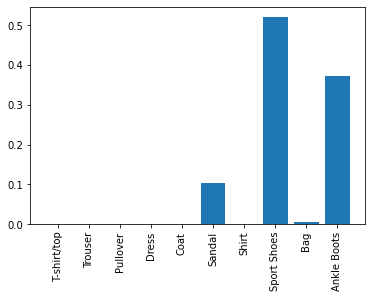

In [ ]:
FMNIST_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sport Shoes','Bag','Ankle Boots']
plt.xticks(np.arange(10),labels=FMNIST_labels,rotation='vertical')
plt.bar(np.arange(10), nps)

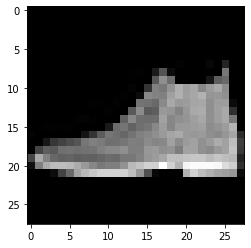

In [ ]:
def denormalize(tensor):
  tensor = tensor*0.5 + 0.5
  return tensor
  
img = img.view(28,-1)
img = denormalize(img)
plt.imshow(img,cmap='gray')

In [ ]:
with torch.no_grad():
    num_correct = 0
    total = 0

    cnt = 0
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        print(output)
        cnt+=1
        
        if cnt > 0:
          break

tensor([[2.4147e-06, 9.3966e-07, 1.3331e-05, 2.6042e-06, 6.9758e-06, 1.0339e-01,
         6.1020e-06, 5.2014e-01, 5.0762e-03, 3.7136e-01],
        [7.0065e-04, 5.7844e-05, 9.5016e-01, 9.0806e-05, 1.4368e-02, 5.8274e-06,
         3.4279e-02, 4.7315e-09, 3.3531e-04, 2.0505e-07],
        [6.2973e-06, 9.9988e-01, 2.1782e-05, 5.9295e-05, 3.0819e-05, 1.0195e-08,
         7.5068e-08, 4.4480e-07, 1.5312e-09, 4.3645e-09],
        [1.7397e-06, 9.9970e-01, 2.6714e-05, 2.4845e-04, 2.4004e-05, 7.6634e-08,
         6.2778e-08, 1.9992e-06, 3.8013e-09, 2.5508e-08],
        [1.2300e-01, 1.4104e-03, 2.5360e-01, 1.6446e-02, 1.6410e-02, 2.5767e-04,
         5.8256e-01, 2.1697e-06, 6.2983e-03, 1.1541e-05],
        [8.3767e-04, 9.9298e-01, 6.5921e-04, 1.4443e-03, 4.0207e-03, 2.5630e-07,
         4.9226e-05, 3.9015e-06, 4.6262e-07, 1.2182e-07],
        [1.3166e-02, 2.5694e-03, 1.0320e-01, 1.2752e-03, 7.5368e-01, 1.3873e-04,
         1.2434e-01, 1.6644e-06, 1.6258e-03, 1.1655e-06],
        [7.0272e-03, 9.2986

In [ ]:
with torch.no_grad():
    num_correct = 0
    total = 0

    #set_trace()
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        
        pred = torch.argmax(output, 1)
        total += labels.size(0)


In [ ]:
pred, labels

(tensor([3, 1, 7, 5, 8, 2, 5, 2, 8, 9, 1, 9, 1, 8, 1, 5]),
 tensor([3, 2, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5]))

In [ ]:
pred == labels

tensor([ True, False,  True,  True,  True, False,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True])

In [ ]:
with torch.no_grad():
    num_correct = 0
    total = 0

    #set_trace()
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        
        pred = torch.argmax(output, 1)
        total += labels.size(0)
        num_correct += (pred == labels).sum().item()

    print(f'Accuracy of the model on the 10000 test images: {num_correct * 100 / total}% ')

Accuracy of the model on the 10000 test images: 81.68% 
